# 딥러닝 온라인 심화반 <Level 6>에 오신 것을 환영합니다!

<Level 6>의 주제는 <U>Multi Layer Perceptron(MLP, 다층 퍼셉트론)</U>입니다. 우리는 퍼셉트론이 가지고 있는 가장 큰 문제들 중 하나인 XOR 문제에 대해 알아보고, MLP의 개념과 예측 및 학습 방법에 대해 배웠습니다. 마지막으로 우편번호 손글씨 이미지(MNIST)를 인식하는 알고리즘을 업그레이드 해보겠습니다.

## Prerequisites

이전과 같이 MNIST 문제를 풀기 위한 환경 설정을 해줍니다. MNIST 필기체 데이터셋이 내장되어 있는 **keras** 라이브러리가 설치되어 있는지 확인해주세요. 또한 **keras**는 **tensorflow** 상에서 구현된 라이브러리이므로(고수준 API라고 함) **tensorflow**가 우선적으로 설치되어 있어야 합니다.

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore') # 경고 메시지를 숨길 수 있습니다.

In [2]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
# !pip install tensorflow

In [3]:
# 파이썬을 아나콘다로 설치한 경우, 아래 명령어 대신 아나콘다 네비게이터(Anaconda Navigator)를 실행한 뒤
# 좌측의 환경(Environment) 탭에서 설치할 수 있습니다.
# !pip install keras

## MNIST Dataset

이번 과제는 [MNIST 필기체 데이터셋](http://yann.lecun.com/exdb/mnist/)을 활용하여 필기체 이미지를 인식하는 이미지 인식 알고리즘을 **Multi Layer Perceptron**로 작성합니다. 복습 차원에서 퍼셉트론 또는 Single Layer Neural Network을 이용해 MNIST 문제를 해결한 다음, Multi Layer Perceptron으로 이것을 개선해보겠습니다.

**1. MNIST 데이터셋 구성**
> 가로 28px, 세로 28px의 필기체 이미지가 주어지며, 필기체는 숫자 0부터 9까지 총 10개의 Label로 구성되어 있습니다. 이미지는 컬러가 없는 흑백 데이터이며, 한 픽셀의 값은 0 ~ 255입니다. (0일수록 어둡고, 255일수록 밝습니다.)

**2. Train, Test Set**
> 데이터는 60,000개의 Train 데이터와 10,000개의 Test 데이터가 주어지는데, Train 데이터로 Multi-layer Neural Network를 학습한 뒤 Test 데이터로 정확도(accuracy)를 측정합니다. 각 변수의 세부 정보는 다음과 같습니다.

   * **X_train**: **Train 데이터의 Feature**입니다. 가로 28px, 세로 28px, 총 60,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255입니다.
   * **y_train**: **Train 데이터의 Label**입니다. 총 60,000개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지 입니다.  
   * **X_test**: **Test 데이터의 Feature**입니다. 가로 28px, 세로 28px, 총 10,000개의 데이터로 구성되어 있습니다. 픽셀 하나의 값은 0 ~ 255입니다.
   * **y_test**: **Test 데이터의 Label** 입니다. 총 10,000 개이며, 이미지가 어떤 숫자를 나타내는지가 적혀 있습니다. 값은 0부터 9까지입니다.


**3. 주의 사항**

  * 이전에 ***XOR data를 풀었던 코드를 조금만 응용***하면 매우 쉽게 MNIST 데이터셋 문제를 풀 수 있습니다.
  * Accuracy가 잘 올라가지 않고 그 이유를 잘 모르겠다면, ***Loss Function(=Cross Entropy)를 병행***해서 사용해보세요. 앞서 언급드린대로 Loss Function은 <U>학습이 잘 될수록 0에 수렴하고, 학습이 잘 되지 않을수록 무한대로 발산합니다.</U> 즉, Loss Function을 사용할 결과가 무한대로 발산하고 있다면 무언가 제대로 풀리지 않고 있다는 것입니다.
  * Loss가 제대로 떨어지지 않는다면 문제는 크게 두 가지입니다. 1) weight의 초기값이 좋지 않거나, 2) learning rate가 너무 높거나 낮아서 생기는 문제입니다. Loss가 떨어지지 않는다면 ***weight의 초기값과 learning rate를 바꿔보세요.***

In [4]:
from keras.datasets import mnist

# 케라스 라이브러리에서 MNIST 데이터셋을 불러옵니다.
# 다소 시간이 걸립니다.
((X_train, y_train), (X_test, y_test)) = mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


[5 0 4 1 9 2 1 3 1 4]


<Figure size 432x288 with 0 Axes>

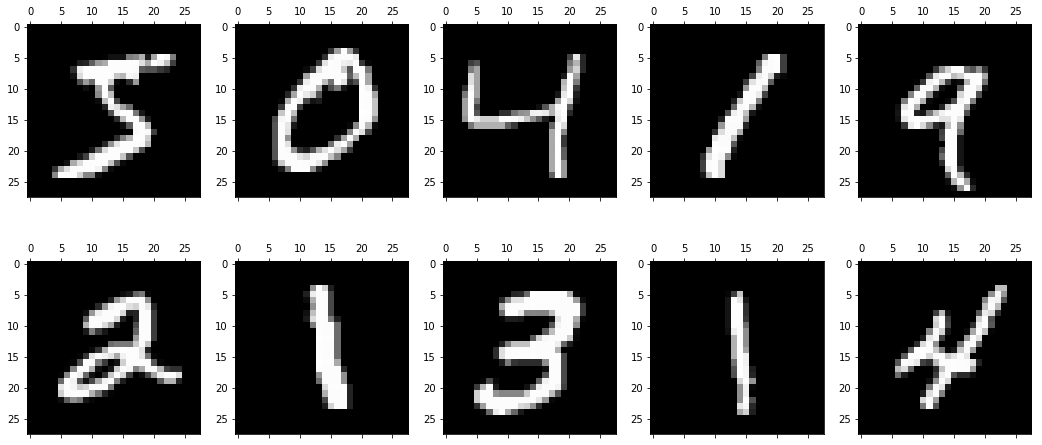

In [5]:
# MNIST 데이터셋을 간략히 살펴보겠습니다.
import matplotlib.pyplot as plt
%matplotlib inline

plt.gray() # 그레이스케일로 만들어줍니다.
figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

 # train set 10개만 보겠습니다.
print(y_train[0:10])

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Preprocessing

### Define Sigmoid

In [6]:
# 활성화 함수로써 sigmoid를 정의해줍니다.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

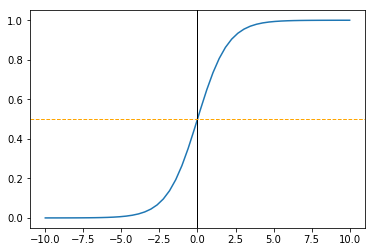

In [7]:
# sigmoid 함수는 다음과 같은 S자형 함수입니다.
xx = np.linspace(-10, 10) # start=-10, stop=10
yy = sigmoid(xx)
plt.plot(xx, yy)

# -1과 1사이의 값을 갖고, y절편은 0.5입니다.
plt.axvline(x=0, color="black", linewidth=1) 
plt.axhline(y=0.5, linestyle='--', color="orange", linewidth=1)
plt.show()

### Define Cross Entropy

In [8]:
# loss function으로써 cross entropy를 정의해줍니다.
def cross_entropy(actual, predict, eps=1e-15):
    
    # 실제 값과 예측 값을 Numpy 배열로 바꿔줍니다.
    actual = np.array(actual)
    predict = np.array(predict)
    
    # 0이 log에 들어가게 되면 무한대로 발산해버릴 수 있으니 아주 작은 값을 넣어 이를 방지합니다.
    clipped_predict = np.minimum(np.maximum(predict, eps), 1 - eps)
    
    # 실질적인 Loss를 계산합니다
    loss = actual * np.log(clipped_predict) + (1 - actual) * np.log(1 - clipped_predict)
    
    return -1.0 * loss.mean()

### Define derivative of sigmoid

In [9]:
# derivative of sigmoid function
def dsigmoid(A):
    # sigmoid 함수를 미분하면 출력값 * (1-출력값)과 같습니다.
    dA = A * (1 - A)
    return dA

In [10]:
memoryview

memoryview

# Data reshape

In [11]:
from keras.utils import to_categorical
X_train = X_train.reshape(60000, 28 * 28)
# 이때 각각의 원소는 픽셀의 값으로, 0~255 사이의 값을 가질 것입니다.
X_test = X_test.reshape(10000, 28 * 28)

# 주어진 데이터는 0~9까지 10개의 라벨을 갖습니다.
# 각 라벨에 해당하는 경우 1, 아니면 0이 되도록 One hot encoding을 해줍니다.

y_train_hot = to_categorical(y_train) # np.eye(10)[y_train]과 동일
y_test_hot = to_categorical(y_test) # np.eye(10)[y_test]와 동일

print(y_train_hot.shape)
print(y_test_hot.shape)

(60000, 10)
(10000, 10)


In [12]:
# 퍼셉트론 알고리즘에 투입하는 X, y를 transpose해줍니다.
X_train = X_train.T
y_train_hot = y_train_hot.T
print(X_train.shape, y_train_hot.shape)
# train set의 경우 (784, 60000), (10, 60000)입니다.

X_test = X_test.T
y_test_hot = y_test_hot.T
print(X_test.shape, y_test_hot.shape)
# test set의 경우 (784, 60000), (10, 10000)입니다.

(784, 60000) (10, 60000)
(784, 10000) (10, 10000)


## Solving MNIST problem using Multi-layer Neural Network

다음으로 Multi Layer Perceptron 알고리즘을 사용할 것입니다. 1개의 은닉층(hidden layer), 특히 노드를 1,000개로 설정함으로써 wide한 인공신경망을 만들어주었습니다. 은닉층이 1개이므로 w와 b를 두 쌍 학습해야 합니다. 이번에는 정확도가 0.9에 도달할 때까지 학습하도록 하겠습니다.

mini batch를 활용해 빠른 결과를 얻어보도록 하겠습니다.

In [14]:
np.random.seed(10)

w1 = np.random.uniform(-1.0, high = 1.0, size = (1000,28 * 28))
b1 = np.random.uniform(-1.0, high = 1.0, size = (1000,1))
w2 = np.random.uniform(-1.0, high = 1.0, size = (10,1000))
b2 = np.random.uniform(-1.0, high = 1.0, size = (10,1))

batch_size = 20
learning_rate = 0.001
num_epoch = 10000
num_data = X_train.shape[1]
num_batch = num_data // batch_size
accuracy_mean = 0
loss_mean = 0
print(num_batch)
# 학습 시작!
for epoch in range(num_epoch):
    accuracy_status = True
    for sample_run in range(num_batch):
        X = X_train[: ,sample_run * batch_size : (sample_run + 1) * batch_size]
        y = y_train_hot[:, sample_run * batch_size : (sample_run + 1) * batch_size]
        # 먼저 합성곱을 해준 다음, 시그모이드 함수에 넣어줍니다.
        z1 = np.dot(w1, X) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(w2, a1) + b2
        a2 = sigmoid(z2)
        y_predict_hot = a2
        
        # 예측값은 0~9 의 벡터 중 제일 높은 값을 갖는 index로 변환되어야합니다.
        y_predict = np.argmax(y_predict_hot, axis=0) 
        
        accuracy = (np.equal(y_predict, y_train[sample_run * batch_size : (sample_run + 1) * batch_size])).mean()
        loss = cross_entropy(y, y_predict_hot)
        
        # 위에서 구한 accuracy와 lass 는 이번 mini batch의 정확도와 loss function입니다.
        # 전체 data set 의 정확도와 loss function은 각각의 mini batch 의 값들을 평균을 내야합니다.
        # 최근 num_batch 의 평균을 내겠습니다. (계산 횟수가 너무 늘어나는 단점이 있긴 한데...)
        accuracy_mean = (accuracy_mean * (num_batch - 1) + accuracy) / num_batch
        loss_mean = (loss * (num_batch - 1) + loss) / num_batch
        
        if accuracy_mean >= 0.99 : break

        # 경사하강법에 따라 비용함수를 최소화하도록 각 값들을 갱신해줍니다
        d1 = a2 - y
        d2 = np.dot(w2.T, d1) * (dsigmoid(a1))
        
        # 배치 사이즈에 기반하여 업데이트 해줍니다.
        w1 -= learning_rate * np.dot(d2, X.T)
        b1 -= learning_rate * d2.sum(axis = 1, keepdims = True)
        w2 -= learning_rate * np.dot(d1, a1.T)
        b2 -= learning_rate * d1.sum(axis = 1, keepdims = True)
        
    if accuracy_mean >= 1 : break    
    print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy_mean, loss_mean))
    
print("-----"*10)
print("{0:2} accuracy = {1:.5f}, loss = {2:.5f}".format(epoch, accuracy_mean, loss_mean))

3000
 0 accuracy = 0.47904, loss = 0.06874
 1 accuracy = 0.70943, loss = 0.10990
 2 accuracy = 0.81043, loss = 0.07126
 3 accuracy = 0.85561, loss = 0.03136
 4 accuracy = 0.87885, loss = 0.02795
 5 accuracy = 0.89213, loss = 0.02171
 6 accuracy = 0.90105, loss = 0.03753
 7 accuracy = 0.90797, loss = 0.03009
 8 accuracy = 0.91399, loss = 0.01833
 9 accuracy = 0.91799, loss = 0.02316
10 accuracy = 0.92144, loss = 0.01393
11 accuracy = 0.92431, loss = 0.01767
12 accuracy = 0.92683, loss = 0.00944
13 accuracy = 0.92793, loss = 0.01491
14 accuracy = 0.93029, loss = 0.01206
15 accuracy = 0.93190, loss = 0.00878
16 accuracy = 0.93365, loss = 0.01283
17 accuracy = 0.93568, loss = 0.02306
18 accuracy = 0.93735, loss = 0.04163
19 accuracy = 0.93859, loss = 0.02660
20 accuracy = 0.93984, loss = 0.01278
21 accuracy = 0.94108, loss = 0.01267
22 accuracy = 0.94213, loss = 0.01161
23 accuracy = 0.94390, loss = 0.00907
24 accuracy = 0.94430, loss = 0.01304
25 accuracy = 0.94556, loss = 0.01664
26 accu

KeyboardInterrupt: 

### Evaluate (Train)

In [15]:
# 학습한 w, b를 가지고 실제값과 예측값을 계산해봅시다.
# 먼저 train set에 대해서 결괏값을 만들어줍니다.
z1 = np.dot(w1, X_train[:, :1000]) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)

y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=0)

# actual vs. predict
train_result = pd.DataFrame({'actual': y_train[:1000], 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
train_accuracy = (train_result["actual"] == train_result["predict"]).mean()
print("Accuracy(train) = {0:.5f}".format(train_accuracy))

print(train_result.shape)
train_result.head(10)

Accuracy(train) = 0.97100
(1000, 2)


,actual,predict
0,5,5
1,0,0
2,4,4
3,1,1
4,9,9
5,2,2
6,1,1
7,3,3
8,1,1
9,4,4


### Evaluate (Test)

In [16]:
# 다음으로 test set에 대해서 결괏값을 만들어줍니다.
z1 = np.dot(w1, X_test) + b1
a1 = sigmoid(z1)
z2 = np.dot(w2, a1) + b2
a2 = sigmoid(z2)

y_predict_hot = a2
y_predict = np.argmax(y_predict_hot, axis=0)

# actual vs. predict
test_result = pd.DataFrame({'actual': y_test, 'predict': y_predict})

# accuracy는 다음과 같이 계산됩니다.
test_accuracy = (test_result["actual"] == test_result["predict"]).mean()
print("Accuracy(test) = {0:.5f}".format(test_accuracy))

print(test_result.shape)
test_result.head(10)

Accuracy(test) = 0.96440
(10000, 2)


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9
